# TOÁN ỨNG DỤNG VÀ THỐNG KÊ

## Đồ án cuối kì

---

**Thông Tin Sinh Viên**
- Lớp: CQ2022/3
- Họ và tên: Trương Tiến Anh
- MSSV: 22120017

### **Thư viện hỗ trợ**

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn import linear_model

### **Bổ trợ 2 hàm tính tích ma trận và tính lũy thừa mà trận**

In [16]:
# Hàm tính tích của hai ma trận
def matrixMultiply(A, B):
    return [
        [
            sum(A[i][k] * B[k][j] for k in range(len(B)))
            for j in range(len(B[0]))
        ]
        for i in range(len(A))
    ]

def matrixPower(matrix, power):# tính lũy thừa ma trận
    if len(matrix) == 0 or len(matrix) != len(matrix[0]):
        raise ValueError("Ma trận không hợp lệ")
    result = [[1 if i == j else 0 for j in range(len(matrix))] for i in range(len(matrix))]
    while power > 0:
        if power % 2 == 1:
            result = matrixMultiply(result, matrix)
        matrix = matrixMultiply(matrix, matrix)
        power //= 2

    return result

### **a) Từ bảng số liệu trên, xây dựng ma trận chuyển trạng thái P của xích Markov**

In [12]:
# Dữ liệu năm 2020 và 2021
data_2020 = np.array([34, 12, 3, 1])
data_2021 = np.array([26, 17, 5, 2])

transitionMatrix = np.zeros((4, 4))

temp = 0
for i in range(4):
    for j in range(4):
        if i > j or j > i + 1:  
            transitionMatrix[i, j] = 0
        elif i == j:
            transitionMatrix[i, j] = data_2021[i] - temp  
            temp = data_2020[i] - transitionMatrix[i, j]  
        else:
            transitionMatrix[i, j] = temp

# Tính xác suất chuyển trạng thái
transitionMatrixProbs = transitionMatrix / data_2020[:, None]

states = ['CSVC tốt', 'CSVC khá', 'CSVC trung bình', 'CSVC xấu']
transition_df = pd.DataFrame(transitionMatrixProbs, index=states, columns=states)

print("Bảng chuyển trạng thái xác suất:")
print(transition_df)


Bảng chuyển trạng thái xác suất:
                 CSVC tốt  CSVC khá  CSVC trung bình  CSVC xấu
CSVC tốt         0.764706  0.235294         0.000000  0.000000
CSVC khá         0.000000  0.750000         0.250000  0.000000
CSVC trung bình  0.000000  0.000000         0.666667  0.333333
CSVC xấu         0.000000  0.000000         0.000000  1.000000


### Ý tưởng
Quá trình xuống cấp của các tòa nhà là một quá trình ngẫu nhiên có tính Markov. Như vậy, ta có thể xây dựng được một xích Markov như sau:
* Tập hợp các trạng thái xích Markov:
`S = {1, 2, 3, 4}`
* Từ bảng dữ liệu đề bài ta xây dựng được ma trận chuyển trạng thái này sang trạng thái khác:
    * Thực hiện 2 vòng lặp để xác định số lượng phòng học chuyển đổi từ mỗi trạng thái trong năm 2020 sang các trạng thái trong năm 2021, tuân theo nguyên tắc không chuyển quá 1 cấp.
    * 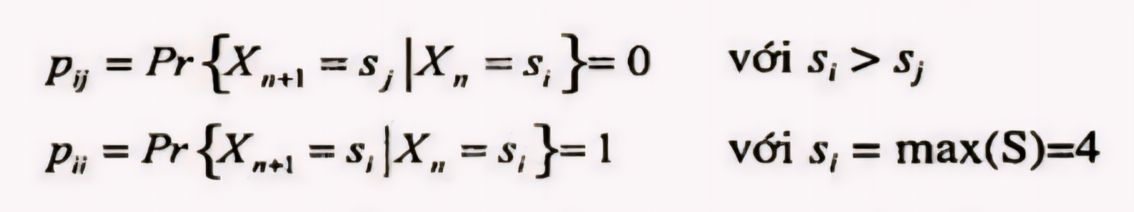
* Tính toán ma trận xác suất chuyển trạng thái bằng cách chia ma trận tần suất chuyển đổi cho tổng số phòng học ở mỗi trạng thái ban đầu.


### **b)	Với các điều kiện của bài toán đã cho, xác định vector phân phối xác suất ban đầu 𝜋0**

In [4]:

n=len(data_2021)
sumRoom=sum(data_2021)
initial_prob_dist=np.zeros(n)

for i in range(n):
    if data_2021[i]!=0:
        initial_prob_dist[i]=data_2021[i]/sumRoom
print("Vector phân phối xác suất ban đầu 𝜋0: ", end=' ')
print(initial_prob_dist)

Vector phân phối xác suất ban đầu 𝜋0:  [0.52 0.34 0.1  0.04]


### Ý tưởng
* Từ những tính chất của xích Markov, ta đánh giá được sự xuống cấp của các tòa nhà trên nhờ việc xác định trạng thái của tòa nhà tại các thời điểm trong tương lai ứng với các trạng thái của xích Markov tại các bước chuyển nhất định
* Vector trạng thái ban đầu: coi năm hiện tại (năm 2021) là năm bắt đầu của xích Markov, ta xác định được Vector trạng thái ban đầu như sau:
  * duyệt qua dữ liệu của trạng thái hiện tại là năm 2021, vector trạng thái ban đầu = vector trạng thái của tòa nhà / tổng số tòa nhà 
  * kết quả thu được từ phép tính trên: `π0 = (26/50, 17/50, 5/50, 2/50)`



### **c)	Hãy dự báo sự xuống cấp về CSVC của các phòng học tòa nhà I trong vòng 15 năm tới, kể từ năm 2021. Kết quả dự báo trình bày vào bảng**


In [17]:

num_years = 15
pi = np.zeros((num_years + 1, len(transitionMatrixProbs)))

# Gán phân phối xác suất ban đầu cho năm đầu tiên
pi[0] = initial_prob_dist

# Tính toán phân phối xác suất cho các năm tiếp theo
for year in range(0, num_years + 1):
    pi[year] = np.dot(initial_prob_dist, matrixPower(transitionMatrixProbs, year))
    
pi = np.round(pi * 50)
# Điều chỉnh để tổng của mỗi hàng bằng 50
for i in range(pi.shape[0]):
    row_sum = np.sum(pi[i])
    while row_sum != 50:
        diff = 50 - row_sum
        idx = np.argmax(pi[i])
        pi[i, idx] += diff
        row_sum = np.sum(pi[i])

Result = np.zeros((num_years + 1, 5), dtype=int)
Result[0, 1:] = range(4)

# Gán giá trị cho các năm tiếp theo
for year in range(1, num_years + 1):
    Result[year, 0] = 2020 + year
    Result[year, 1:] = pi[year - 1]

print("Dự báo về sự xuống cấp CSVC của các phòng học tòa nhà I")
print(Result)

Dự báo về sự xuống cấp CSVC của các phòng học tòa nhà I
[[   0    0    1    2    3]
 [2021   26   17    5    2]
 [2022   19   19    8    4]
 [2023   15   19   10    6]
 [2024   12   18   11    9]
 [2025    9   16   12   13]
 [2026    7   14   12   17]
 [2027    5   12   11   22]
 [2028    4   10   11   25]
 [2029    3    9   10   28]
 [2030    2    7    9   32]
 [2031    2    6    8   34]
 [2032    1    5    7   37]
 [2033    1    4    6   39]
 [2034    1    3    5   41]
 [2035    1    3    4   42]]


### Ý tưởng
* Từ vector trạng thái của xích Markov xác định được tại các thời điểm trong tương lai ta tính toán được số tòa nhà ở mỗi trạng thái tương ứng với các thới điểm đó và tổng hợp như bảng bên trên.
* Ma trận chuyển trạng thái (transition matrix): Ma trận này chứa xác suất chuyển từ một trạng thái này sang một trạng thái khác trong một năm. Đây là thông tin cơ bản cần thiết để mô phỏng quá trình xuống cấp.
* So sánh giữa năm 2021 và 2035, ta thấy rõ được sự chuyển biến về xác suất trạng thái của các tòa nhà đang có xu hướng xấu đi (trạng thái 4). Ở trạng thái hiện tại (năm 2021) tòa nhà có chất lượng xấu (trạng thái 4) chỉ chiếm 4%, do các tác động từ môi trường xung quanh cũng như công tác bảo trì chưa được tiến hành nên chỉ sau 15 năm (năm 2035) tỷ lệ tòa nhà chất lượng xấu đã tăng lên 84% tổng số các tòa nhà
  * `năm 2021: [26   17    5    2]`
  * `năm 2035: [1    3    4   42]`




### **d) Xác định thời điểm (năm) phải phá hủy để xây lại/ trùng tu tòa nhà I (tất cả phòng học đều ở trạng thái CSVC xấu)**

In [18]:
start_year = 2021
iteration = 1

# Tìm năm cần phá hủy để xây lại/trùng tu
while True:
    next_state_prob = np.dot(initial_prob_dist, matrixPower(transitionMatrixProbs, iteration))
    print( "𝜋" + str(iteration) + " =", next_state_prob )
    
    # Kiểm tra nếu xác suất trạng thái xấu gần bằng 1
    if np.isclose(1 - next_state_prob[3], 0, atol=1e-9):
        break
    iteration += 1
    start_year += 1

print(f"Tòa nhà cần được xây lại hoặc trùng tu vào năm: {start_year}")


𝜋1 = [0.39764706 0.37735294 0.15166667 0.07333333]
𝜋2 = [0.30408304 0.37657872 0.19544935 0.12388889]
𝜋3 = [0.23253409 0.35398299 0.22444424 0.18903867]
𝜋4 = [0.17782019 0.32020115 0.23812524 0.26385342]
𝜋5 = [0.13598014 0.28199091 0.23880045 0.3432285 ]
𝜋6 = [0.10398482 0.24348851 0.22969803 0.42282865]
𝜋7 = [0.0795178  0.2070834  0.21400414 0.49939466]
𝜋8 = [0.06080773 0.17402262 0.19444028 0.57072937]
𝜋9 = [0.04650003 0.14482466 0.17313251 0.6355428 ]
𝜋10 = [0.03555885 0.11955968 0.15162784 0.69325364]
𝜋11 = [0.02719206 0.09803655 0.13097515 0.74379625]
𝜋12 = [0.02079393 0.07992554 0.1118259  0.78745463]
𝜋13 = [0.01590124 0.06483685 0.09453199 0.82472993]
𝜋14 = [0.01215977 0.0523691  0.07923054 0.85624059]
𝜋15 = [0.00929865 0.04213795 0.06591263 0.88265077]
𝜋16 = [0.00711073 0.03379138 0.05447624 0.90462165]
𝜋17 = [0.00543762 0.02701665 0.04476534 0.9227804 ]
𝜋18 = [0.00415818 0.02154192 0.03659772 0.93770218]
𝜋19 = [0.00317978 0.01713484 0.02978396 0.94990142]
𝜋20 = [0.0024316  0.0

### Ý tưởng
* Lặp lại quá trình tính toán Vector
$
\pi^{(n)} = \pi \cdot P^{(n)}
$
* Vòng lặp kết thúc khi xác suất trạng thái 1, 2, 3 đều về mức 0 (tất các các tòa nhà đều ở trạng thái 4),
ta xác định được 
$\pi^{(90)} = (0, 0, 0, 1)$
. Như vậy theo mô hình dự báo, sao 89 năm nữa (năm 2110), xác suất các tòa nhà chất lượng tốt (ở trạng thái 1), khá (ở trạng thái 2), trung bình (ở trạng thái 3), xấu (ở trạng thái 4) tương ứng là 0, 0, 0, 1. Khi đó tất các các phòng trong hệ thống đều ở trạng thái 4 (chất lượng xấu).

### **e) Xác định tuổi thọ của tòa nhà I**

In [19]:
print("Tuổi thọ của tòa I:", iteration-1, "năm")

Tuổi thọ của tòa I: 89 năm
